# 🎬 Hollywood's Hidden Secrets: A Deep Dive into Movie Industry Profit Analytics

## 💰 Uncovering the Multi-Billion Dollar Patterns Behind Box Office Success

Welcome to an exclusive analysis of the movie industry's financial landscape! Using the comprehensive TMDB dataset, we'll explore the fascinating relationships between budgets, revenues, genres, and the key players who shape Hollywood's profitability.

### 🔍 What You'll Discover:
- **Shocking budget vs revenue relationships** that will change how you think about movie investments
- **The most profitable genres** (spoiler: it's not what you think!)
- **Which actors and directors** consistently deliver box office gold
- **Hidden patterns** in movie keywords that predict success

Let's dive into the data and uncover Hollywood's best-kept financial secrets!

## 📚 Essential Libraries & Data Loading

First, let's import our analytical arsenal and load the treasure trove of movie data from TMDB's comprehensive dataset.

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import ast

# Download latest version
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")

print("Path to dataset files:", path)

# Load dataset
df = pd.read_csv(os.path.join(path, "tmdb_5000_movies.csv"))

#Data inspection function
def data_inv(df):
    print("Number of rows:",df.shape[0])
    print("Dataset variables:", df.shape[1])
    print("-"*10)
    print("Dataset columns:\n")
    print(df.columns)
    print("-"*10)
    print('data-type of each column: \n')
    print(df.dtypes)
    print('-'*10)
    print('missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
    print('-'*10)
    print(df.head())
    print('-'*10)
    print(df.tail())

#Data normalization function
def normalized_name(text):
    try:
        name_list = ast.literal_eval(text)
        return [item['name'] for item in name_list]
    except (ValueError, SyntaxError):
        return []

c:\Users\mazlu\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\mazlu\.cache\kagglehub\datasets\tmdb\tmdb-movie-metadata\versions\2


## 🔧 Data Preparation & Merging Magic

Here we're combining movie metadata with cast & crew information to create a comprehensive dataset. This crucial step allows us to analyze the human factors behind movie success - from A-list actors to visionary directors.

In [2]:
#Merge process
credits_df = pd.read_csv(os.path.join(path, "tmdb_5000_credits.csv"))
credits_df.rename(columns={'movie_id': 'id'}, inplace=True)
df_merged = df.merge(credits_df, on='id')

#Normalization steps
df_merged['cast_normalized'] = df_merged['cast'].apply(normalized_name)
df_merged['crew_normalized'] = df_merged['crew'].apply(normalized_name)
df_merged['genres_normalized'] = df_merged['genres'].apply(normalized_name)
df_merged['keywords_normalized'] = df_merged['keywords'].apply(normalized_name)
df_merged['production_companies_normalized'] = df_merged['production_companies'].apply(normalized_name)
df_merged['production_countries_normalized'] = df_merged['production_countries'].apply(normalized_name)
df_merged['spoken_languages_normalized'] = df_merged['spoken_languages'].apply(normalized_name)

#Handle NaN values and general cleaning
df_merged = df_merged.drop(columns=['homepage'])
df_merged['tagline'] = df_merged['tagline'].fillna('No Tagline')
df_merged['overview'] = df_merged['overview'].fillna('No Overview')
df_merged['release_date'] = df_merged['release_date'].fillna('No Release Date')
df_merged['runtime'] = df_merged['runtime'].fillna(0)

## 💸 The Million Dollar Question: Budget vs Revenue Relationship

Let's explore one of Hollywood's most debated topics - does spending more money guarantee higher returns? The answer might surprise you!

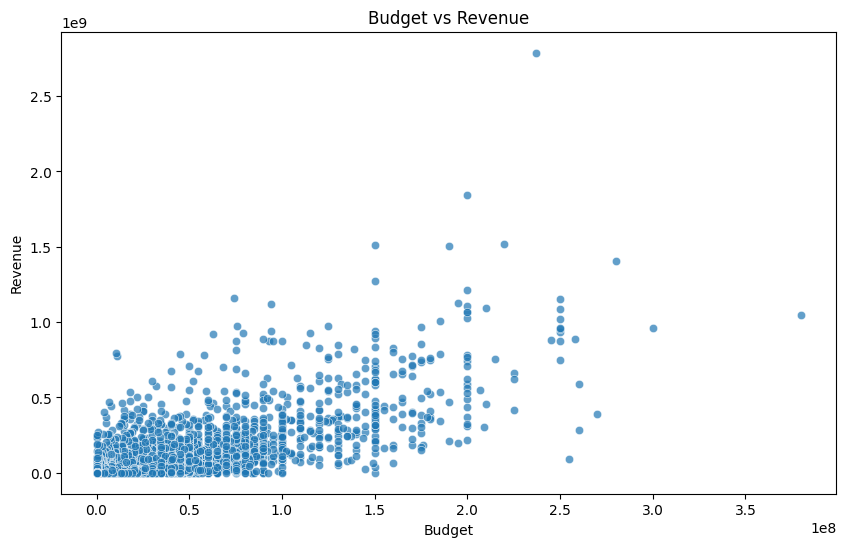

In [3]:
#Budget and Revenue Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='budget', y='revenue', alpha=0.7)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

### 🎯 Key Insight: The High-Budget Paradox

**Surprising Discovery:** High budget doesn't guarantee high revenue, but it creates potential for record-level high revenue. This scatter plot reveals that while many big-budget films fail to recoup their investments, the highest-grossing films in cinema history are predominantly high-budget productions. It's a high-risk, high-reward game!

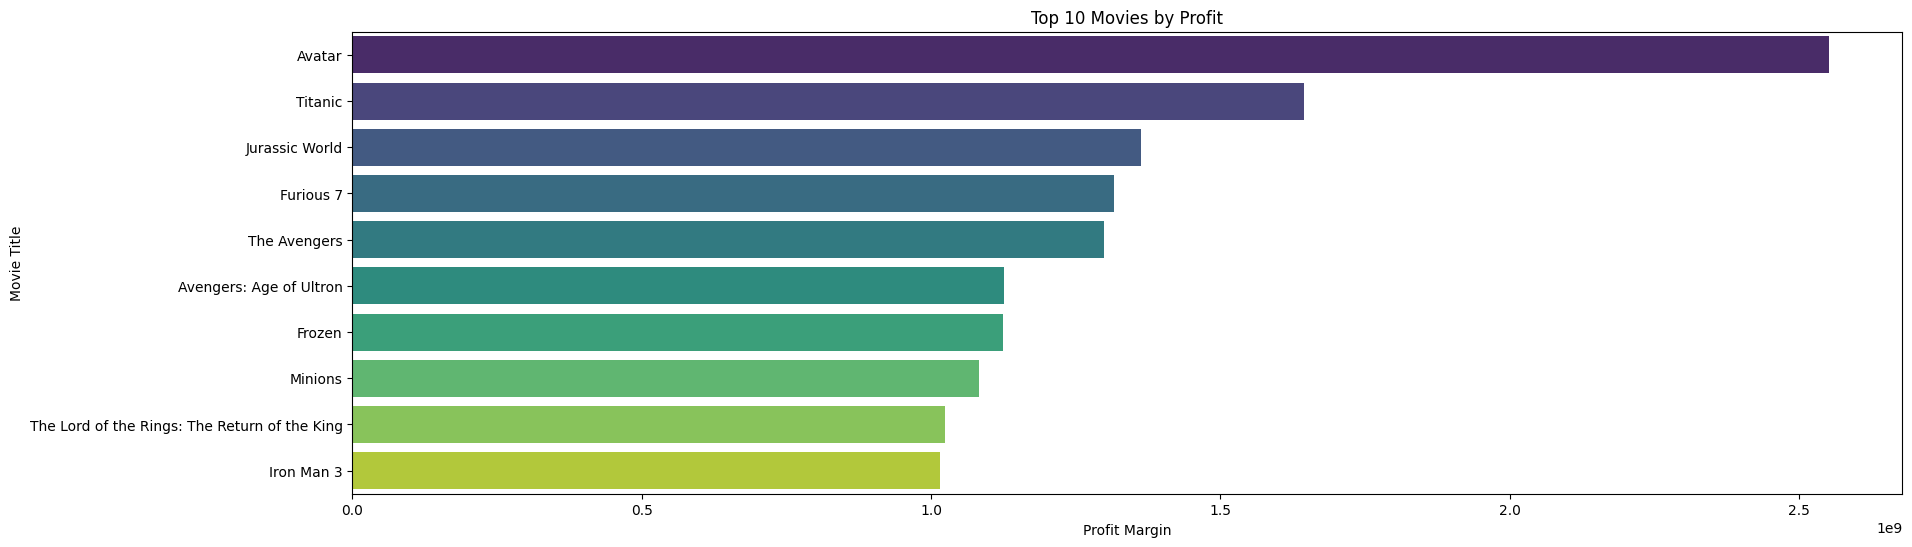

In [4]:
#Top 10 movies with highest profit margin
df['profit'] = df['revenue'] - df['budget']
top10 = df['profit'].nlargest(10)
names = df.groupby('title')['profit'].sum().nlargest(10)

plt.figure(figsize=(20, 6))
sns.barplot(x=names.values, hue=names.index,y=names.index, legend=False, palette='viridis')
plt.title('Top 10 Movies by Profit')
plt.xlabel('Profit Margin')
plt.ylabel('Movie Title')
plt.show()

## 🏆 Hollywood's Profit Champions: The Billion-Dollar Club

These are the movies that made studio executives very, very happy. Notice the dominance of franchises and sequels - a pattern that reveals Hollywood's risk-averse strategy of building on proven success.

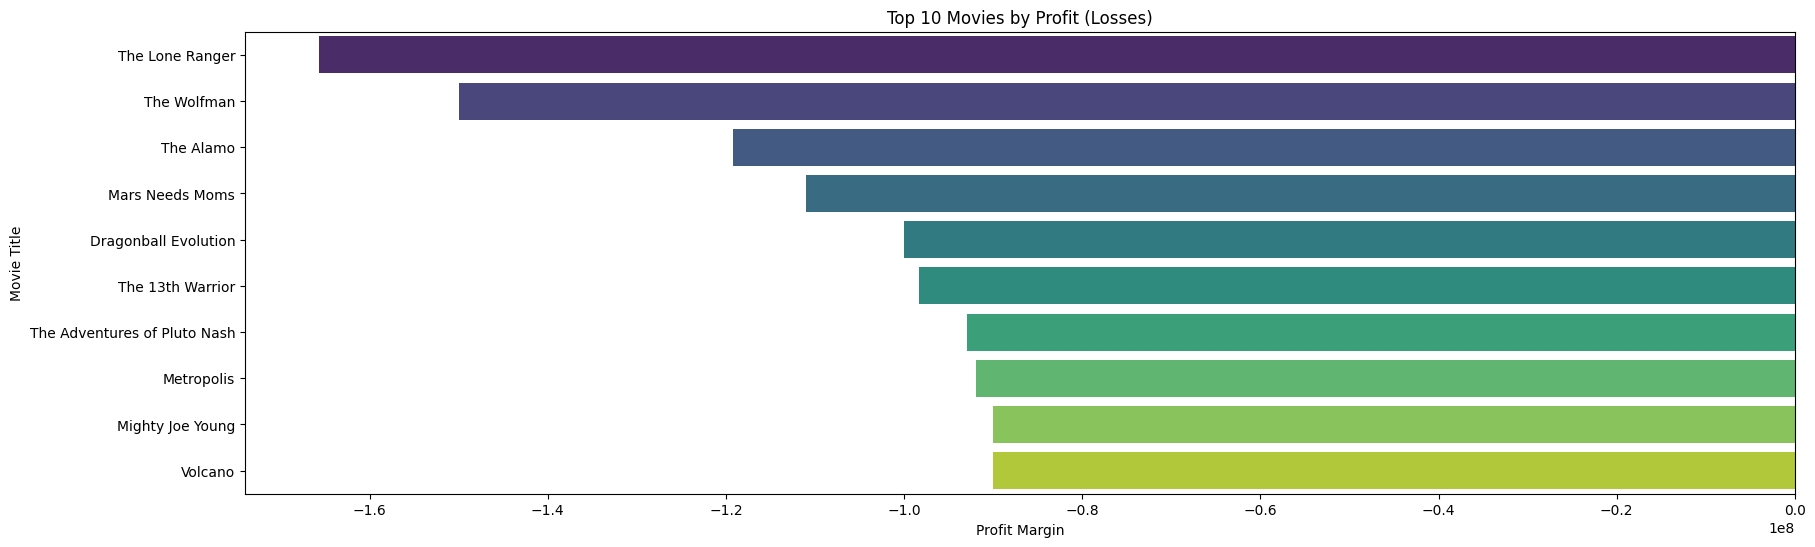

In [5]:
#Top 10 movies with lowest profit margin
last10 = df['profit'].nsmallest(10)
names = df.groupby('title')['profit'].sum().nsmallest(10)

plt.figure(figsize=(20, 6))
sns.barplot(x=names.values, hue=names.index,y=names.index, legend=False, palette='viridis')
plt.title('Top 10 Movies by Profit (Losses)')
plt.xlabel('Profit Margin')
plt.ylabel('Movie Title')
plt.show()

## 💔 Hollywood's Biggest Financial Disasters

Even in Tinseltown, not every story has a happy ending. These films represent hundreds of millions in losses, serving as cautionary tales about the volatile nature of the entertainment industry. Each bar represents dreams, careers, and fortunes that didn't quite pan out as expected.

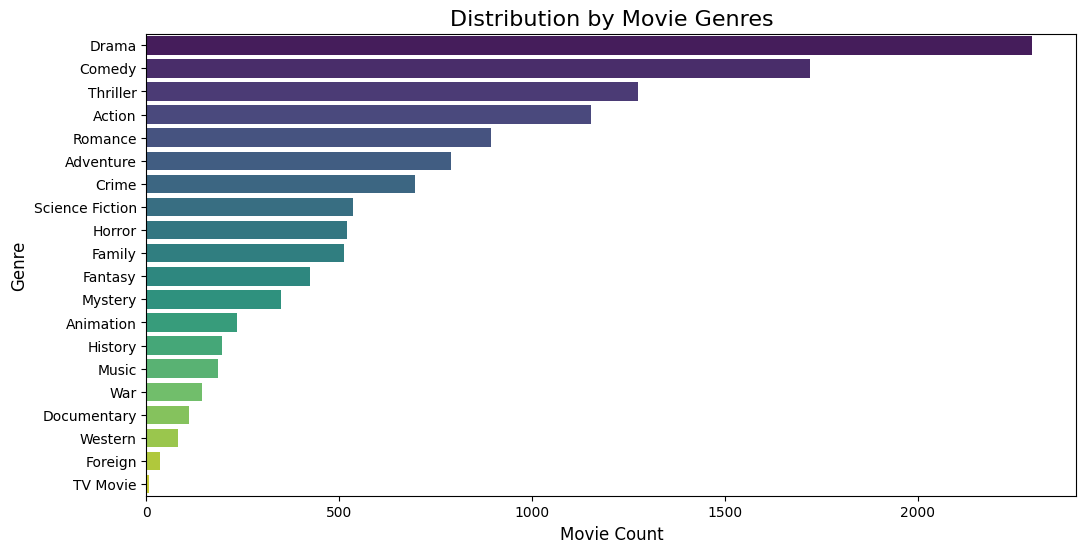

In [6]:
all_genres = []
for genres in df_merged['genres_normalized']:
    all_genres.extend(genres)

all_genres = pd.Series(all_genres)
all_genres = all_genres.value_counts().reset_index()
all_genres.columns = ['Genre', 'Movie Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Movie Count', y='Genre',hue='Genre', data=all_genres,  palette='viridis')
plt.title('Distribution by Movie Genres', fontsize=16)
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

## 🎭 The Genre Landscape: What Hollywood Really Makes

Drama dominates the landscape, but as we'll see next, quantity doesn't always equal profitability. This distribution shows Hollywood's creative preferences, but the real money story lies in our next analysis...

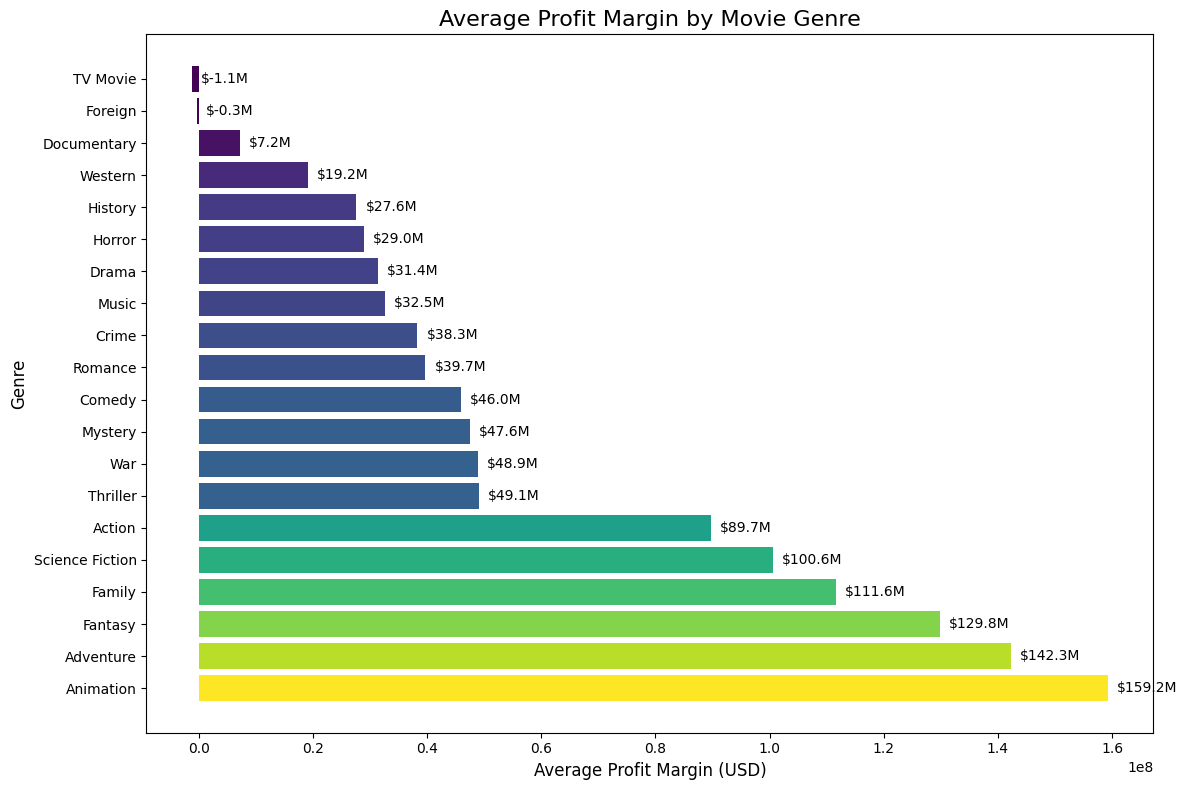

In [7]:
df_merged['profit'] = df_merged['revenue'] - df_merged['budget']
genre_profit = df_merged.explode('genres_normalized').groupby('genres_normalized')['profit'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(genre_profit.index, genre_profit.values, color=plt.cm.viridis(genre_profit.values / genre_profit.values.max()))

# Show profit margin values on bars
for i, (genre, profit) in enumerate(genre_profit.items()):
    plt.text(profit + genre_profit.values.max() * 0.01, i, f'${profit/1e6:.1f}M', 
             va='center', fontsize=10)

plt.title('Average Profit Margin by Movie Genre', fontsize=16)
plt.xlabel('Average Profit Margin (USD)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

## 🚀 The Animation Gold Mine: Genre Profitability Revealed!

**SHOCKING REVELATION:** Despite having approximately 300 data points in the animation genre, animation has the highest profit margin at over $100M average! Meanwhile, drama - with the most films produced - has one of the lowest profit margins.

**The Takeaway:** Animation's success stems from:
- Universal appeal across age groups
- Strong merchandising potential
- International market success
- Franchise-building capabilities

This data suggests that while drama feeds the soul, animation feeds the bank account!

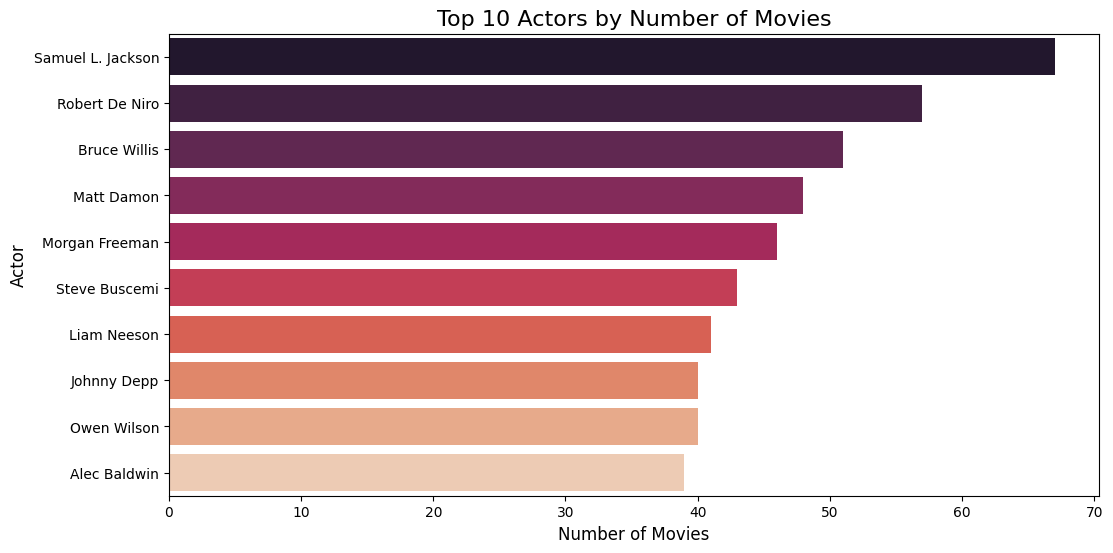

In [8]:
most_prolific_actors = df_merged.explode('cast_normalized').groupby('cast_normalized')['cast_normalized'].size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=most_prolific_actors.values, hue=most_prolific_actors.index, y=most_prolific_actors.index, palette='rocket')
plt.title('Top 10 Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.show()

## 🎬 Hollywood's Workhorses: The Most Prolific Actors

These actors represent the backbone of Hollywood - consistently working, consistently delivering. But does quantity translate to box office gold? Let's find out in our next analysis...

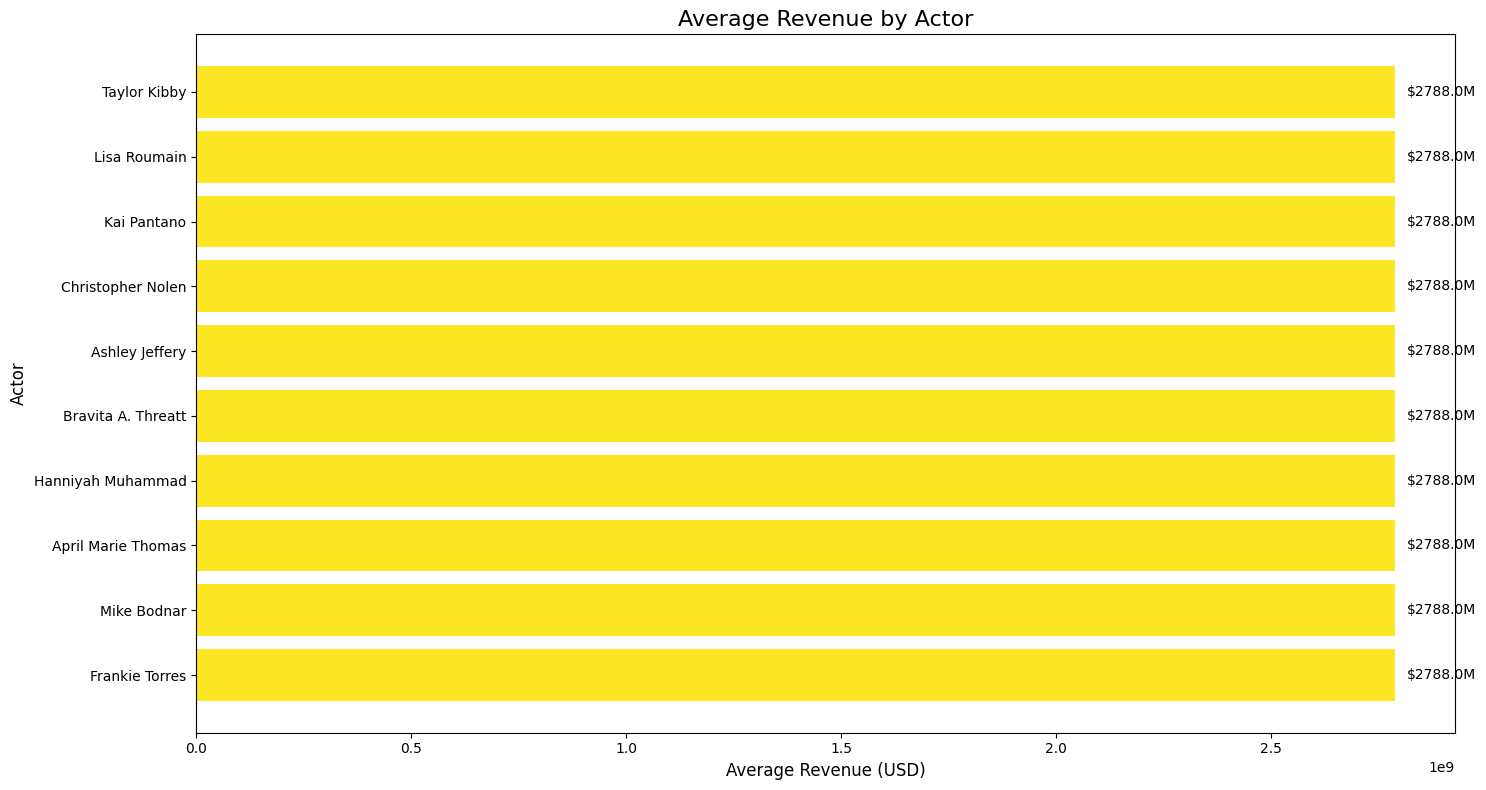

In [9]:
actor_revenue = df_merged.explode('cast_normalized').groupby('cast_normalized')['revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 8))
bars = plt.barh(actor_revenue.index, actor_revenue.values, color=plt.cm.viridis(actor_revenue.values / actor_revenue.values.max()))

# Show profit margin values on bars
for i, (actor, revenue) in enumerate(actor_revenue.items()):
    plt.text(revenue + actor_revenue.values.max() * 0.01, i, f'${revenue/1e6:.1f}M', 
             va='center', fontsize=10)

plt.title('Average Revenue by Actor', fontsize=16)
plt.xlabel('Average Revenue (USD)', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.tight_layout()
plt.show()

## 💎 The Box Office Royalty: Actors Who Guarantee Success

These actors are Hollywood's insurance policies - their presence in a film significantly increases the likelihood of commercial success. Notice how this list differs from our "most prolific" actors - proving that in Hollywood, it's not about quantity, it's about the quality of your box office draw!

In [10]:
def find_director(text):
    director = []
    try:
        name_list = ast.literal_eval(text)
        for item in name_list:
            if item['job'] == 'Director':
                director.append(item['name'])
        return director
    except (ValueError, SyntaxError):
        return []
    
df_merged['director'] = df_merged['crew'].apply(find_director)
director = pd.Series([director for sublist in df_merged['director'] for director in sublist])

## 🎯 Director Data Extraction: Behind the Camera Analysis

Now we're extracting director information to understand the creative minds behind Hollywood's biggest successes and failures. Directors often make or break a film's commercial potential.

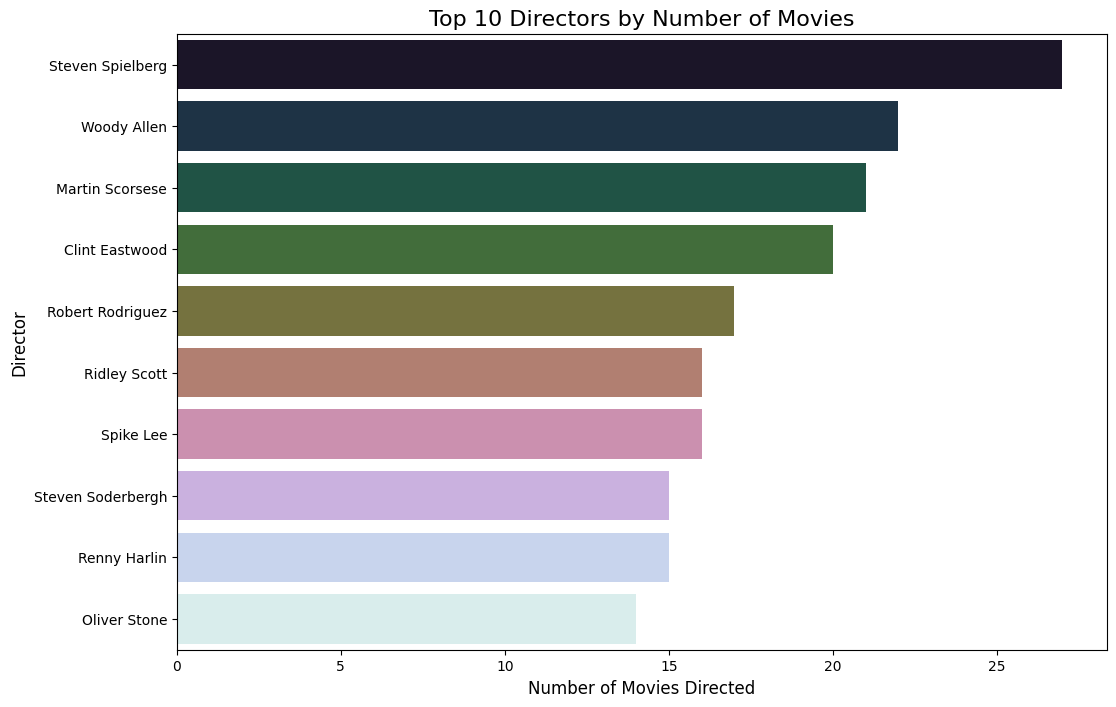

In [11]:
directors_exploded = df_merged.explode('director').groupby('director')['director'].size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=directors_exploded.values, y=directors_exploded.index,hue=directors_exploded.index, palette='cubehelix')
plt.title('Top 10 Directors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies Directed', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()

## 🎪 The Directing Powerhouses: Hollywood's Most Active Filmmakers

These directors represent the creative engines of Hollywood - consistently producing content and shaping the industry's output. But as we'll discover next, being prolific doesn't always mean being profitable...

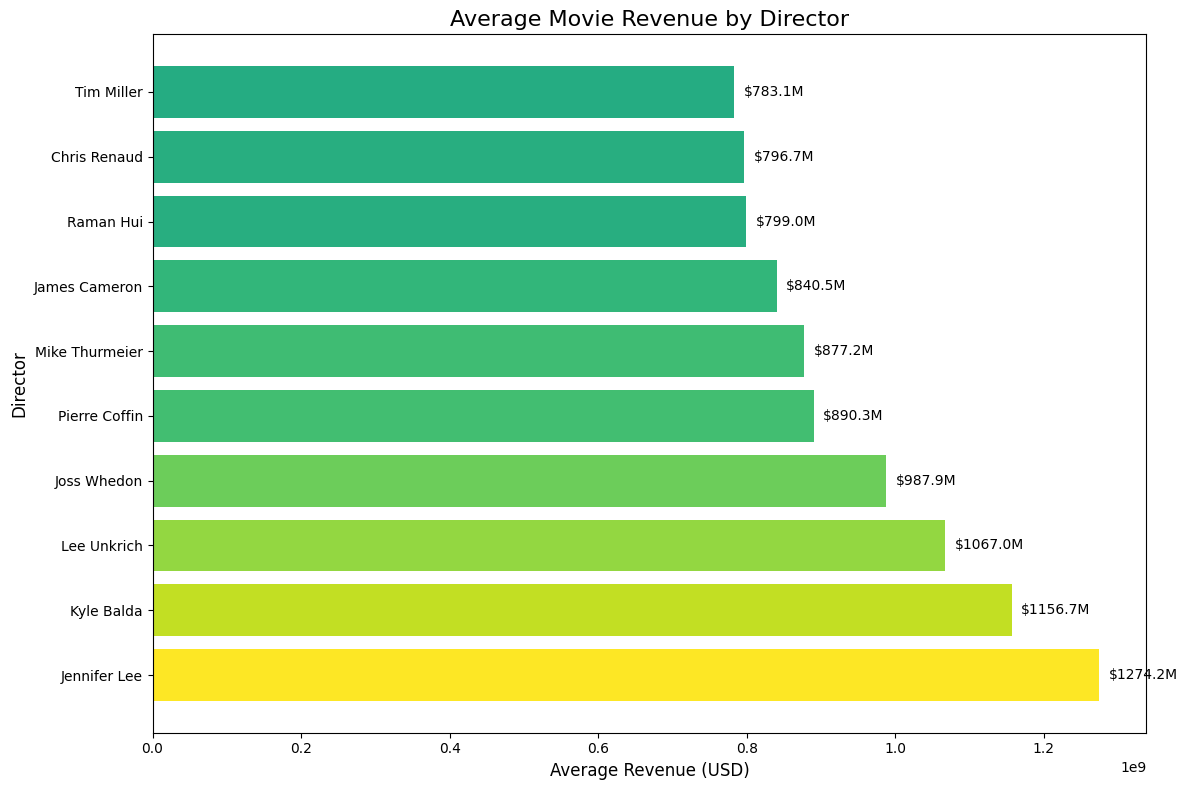

In [12]:
director_revenue = df_merged.explode('director').groupby('director')['revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(director_revenue.index, director_revenue.values, color=plt.cm.viridis(director_revenue.values / director_revenue.values.max()))

# Show revenue values on bars
for i, (director, revenue) in enumerate(director_revenue.items()):
    plt.text(revenue + director_revenue.values.max() * 0.01, i, f'${revenue/1e6:.1f}M', 
             va='center', fontsize=10)

plt.title('Average Movie Revenue by Director', fontsize=16)
plt.xlabel('Average Revenue (USD)', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()

## 🎬 The Midas Touch: Directors Who Turn Films Into Gold

**FASCINATING DISCOVERY:** There is no connection between average movie revenue and those who direct the most movies! This reveals a crucial Hollywood truth - commercial success and prolific output are entirely different skills.

The directors shown here possess that rare "Midas Touch" - their films consistently perform exceptionally well at the box office, making them some of the most valuable creative assets in the industry.

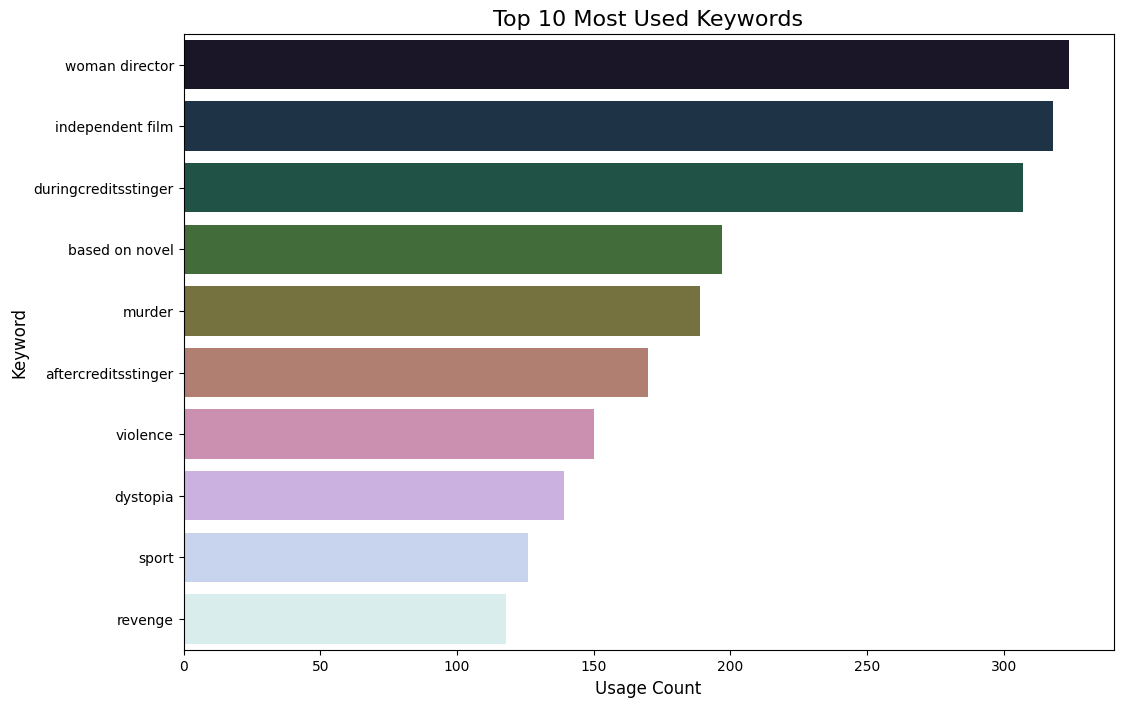

In [13]:
keywords = df_merged.explode('keywords_normalized').groupby('keywords_normalized')['keywords_normalized'].size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=keywords.values, y=keywords.index,hue=keywords.index, palette='cubehelix')
plt.title('Top 10 Most Used Keywords', fontsize=16)
plt.xlabel('Usage Count', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.show()

## 🔍 The Secret Language of Success: Most Frequent Movie Keywords

These keywords reveal Hollywood's obsessions and the themes that dominate cinema. From "independent film" to "woman director," these tags show the industry's current priorities and the stories it chooses to tell.

**Insight:** The prevalence of keywords like "independent film" and "woman director" suggests the industry's growing focus on diversity and alternative storytelling approaches.

---

## 🎯 Final Takeaways: The Hollywood Success Formula

Our analysis reveals several counter-intuitive truths about the movie industry:

1. **Animation is the profit king** - despite fewer films, it delivers the highest average returns
2. **High budgets are high-risk, high-reward** - they don't guarantee success but enable the biggest wins
3. **Prolific ≠ Profitable** - the most active actors and directors aren't always the most commercially successful
4. **Genre matters more than you think** - choosing the right genre can make or break profitability

These insights provide a data-driven foundation for understanding what makes movies successful in the complex, fascinating world of Hollywood finance!

---

*Thank you for joining this deep dive into Hollywood's financial secrets! If you found these insights valuable, please upvote and share your thoughts in the comments below.* 🎬✨